<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


In [1]:
import pandas as pd
from src import soporte_nulos as sn
from src import soporte_preprocesamiento as sc
import warnings
warnings.filterwarnings("ignore")
import numpy as np

# 1. EDA

In [2]:
# cargamos el conjunto de datos con el que vamos a trabajar y mostramos 5 filas aleatorias
df = pd.read_csv("datos/autorenew.csv", index_col = 0) 
df.sample(5)

name   seller  \
dateCrawled                                                                     
2016-03-25 02:36:25                          Mitsubishi_Space_Runner  private   
2016-04-02 18:54:22      Renault_Laguna_Grandtour_1.9_dCi_Expression  private   
2016-03-09 21:59:14                             Opel_Antara_2.0_CDTI  private   
2016-04-03 21:25:21              Schoener_Bmw_x3_3D_voll_Ausstattung  private   
2016-04-03 10:42:33  BMW_320d_DPF_Touring_Aut._M_Paket___Navi___19_"  private   

                    offerType  price   abtest vehicleType  yearOfRegistration  \
dateCrawled                                                                     
2016-03-25 02:36:25     offer    500  control         bus                1996   
2016-04-02 18:54:22     offer   1600  control       combi                2002   
2016-03-09 21:59:14     offer   7900     test         suv                2007   
2016-04-03 21:25:21     offer   8300     test         suv                2005   
2016-04-03 10:42:33     offer  11000  control       combi                2006   

                       gearbox  powerCV    model  kilometer  \
dateCrawled                                                   
2016-03-25 02:36:25   manually    120.0   andere     150000   
2016-04-02 18:54:22   manually    118.0   laguna     150000   
2016-03-09 21:59:14   manually    148.0   antara     150000   
2016-04-03 21:25:21  automatic      0.0  x_reihe     150000   
2016-04-03 10:42:33  automatic    161.0      3er     150000   

                     monthOfRegistration fuelType       brand  \
dateCrawled                                                     
2016-03-25 02:36:25                    6   petrol  mitsubishi   
2016-04-02 18:54:22                    9   diesel     renault   
2016-03-09 21:59:14                    3      NaN        opel   
2016-04-03 21:25:21                   10   diesel         bmw   
2016-04-03 10:42:33                   11   diesel         bmw   

                    notRepairedDamage          dateCreated  nrOfPictures  \
dateCrawled                                                                
2016-03-25 02:36:25               NaN  2016-03-25 00:00:00             0   
2016-04-02 18:54:22                no  2016-04-02 00:00:00             0   
2016-03-09 21:59:14                no  2016-03-09 00:00:00             0   
2016-04-03 21:25:21               NaN  2016-04-03 00:00:00             0   
2016-04-03 10:42:33                no  2016-04-03 00:00:00             0   

                     postalCode             lastSeen  
dateCrawled                                           
2016-03-25 02:36:25       87616  2016-04-04 06:19:18  
2016-04-02 18:54:22       18442  2016-04-04 17:45:36  
2016-03-09 21:59:14       67354  2016-03-12 09:46:54  
2016-04-03 21:25:21       35576  2016-04-04 19:16:40  
2016-04-03 10:42:33       84130  2016-04-05 08:49:27

In [3]:
# Crear una instancia de la clase y llamar a los métodos
visualizador =sc.Visualizador(df)

# llamamos al métedo para explorar los datos
sc.exploracion_datos(df)

El número de filas es 371528 y el número de columnas es 19

----------

En este conjunto de datos tenemos 29 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


vehicleType          36.003478
gearbox               5.439429
model                 5.513447
fuelType              8.986133
notRepairedDamage    19.395577
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


count           mean           std     min       25%  \
price                371528.0   17295.141865  3.587954e+06     0.0    1150.0   
yearOfRegistration   371528.0    2004.577997  9.286660e+01  1000.0    1999.0   
powerCV              371528.0     113.967833  1.895166e+02     0.0      69.0   
kilometer            371528.0  125618.688228  4.011234e+04  5000.0  125000.0   
monthOfRegistration  371528.0       5.734445  3.712412e+00     0.0       3.0   
nrOfPictures         371528.0       0.000000  0.000000e+00     0.0       0.0   
postalCode           371528.0   50820.667640  2.579908e+04  1067.0   30459.0   

                          50%       75%           max  
price                  2950.0    7200.0  2.147484e+09  
yearOfRegistration     2003.0    2008.0  9.999000e+03  
powerCV                 104.0     148.0  1.972600e+04  
kilometer            150000.0  150000.0  1.500000e+05  
monthOfRegistration       6.0       9.0  1.200000e+01  
nrOfPictures              0.0       0.0  0.000000e+00  
postalCode            49610.0   71546.0  9.999800e+04


----------

Las principales estadísticas de las variables categóricas son:


count  unique                  top    freq
name               371528  233531          Ford_Fiesta     657
seller             371528       2              private  371525
offerType          371528       2                offer  371516
abtest             371528       2                 test  192585
vehicleType        237765       7            small car   80023
gearbox            351319       2             manually  274214
model              351044     251                 golf   30070
fuelType           338142       7               petrol  223857
brand              371528      40           volkswagen   79640
notRepairedDamage  299468       2                   no  263182
dateCreated        371528     114  2016-04-03 00:00:00   14450
lastSeen           371528  182806  2016-04-07 06:45:59      17


----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 371528 entries, 2016-03-24 11:52:17 to 2016-03-07 19:39:19
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 371528 non-null  object 
 1   seller               371528 non-null  object 
 2   offerType            371528 non-null  object 
 3   price                371528 non-null  int64  
 4   abtest               371528 non-null  object 
 5   vehicleType          237765 non-null  object 
 6   yearOfRegistration   371528 non-null  int64  
 7   gearbox              351319 non-null  object 
 8   powerCV              371528 non-null  float64
 9   model                351044 non-null  object 
 10  kilometer            371528 non-null  int64  
 11  monthOfRegistration  371528 non-null  int64  
 12  fuelType             338142 non-null  object 
 13  brand                371528 n

None

In [4]:
df_filtrado_categoricas = df.reset_index().drop(["name", "dateCreated", "lastSeen", "dateCrawled", "model", "kilometer", "postalCode"], axis=1)
df_filtrado_categoricas 


seller offerType  price   abtest  vehicleType  yearOfRegistration  \
0       private     offer    480     test          NaN                1993   
1       private     offer  18300     test        coupe                2011   
2       private     offer   9800     test          suv                2004   
3       private     offer   1500     test    small car                2001   
4       private     offer   3600     test    small car                2008   
...         ...       ...    ...      ...          ...                 ...   
371523  private     offer   2200     test          NaN                2005   
371524  private     offer   1199     test  convertible                2000   
371525  private     offer   9200     test          bus                1996   
371526  private     offer   3400     test        combi                2002   
371527  private     offer  28990  control          NaN                2013   

          gearbox  powerCV  monthOfRegistration fuelType           brand  \
0        manually      0.0                    0   petrol      volkswagen   
1        manually    187.0                    5   diesel            audi   
2       automatic    161.0                    8   diesel            jeep   
3        manually     74.0                    6   petrol      volkswagen   
4        manually     68.0                    7   diesel           skoda   
...           ...      ...                  ...      ...             ...   
371523        NaN      0.0                    1      NaN  sonstige_autos   
371524  automatic    100.0                    3   petrol           smart   
371525   manually    101.0                    3   diesel      volkswagen   
371526   manually     99.0                    6   diesel      volkswagen   
371527   manually    316.0                    8   petrol             bmw   

       notRepairedDamage  nrOfPictures  
0                    NaN             0  
1                    yes             0  
2                    NaN             0  
3                     no             0  
4                     no             0  
...                  ...           ...  
371523               NaN             0  
371524                no             0  
371525                no             0  
371526               NaN             0  
371527                no             0  

[371528 rows x 13 columns]

In [5]:
visualizador2 =sc.Visualizador(df_filtrado_categoricas)

In [6]:
df_filtrado_categoricas.drop_duplicates(inplace=True)

In [7]:
df_filtrado_categoricas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350056 entries, 0 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   seller               350056 non-null  object 
 1   offerType            350056 non-null  object 
 2   price                350056 non-null  int64  
 3   abtest               350056 non-null  object 
 4   vehicleType          224722 non-null  object 
 5   yearOfRegistration   350056 non-null  int64  
 6   gearbox              332495 non-null  object 
 7   powerCV              350056 non-null  float64
 8   monthOfRegistration  350056 non-null  int64  
 9   fuelType             318853 non-null  object 
 10  brand                350056 non-null  object 
 11  notRepairedDamage    282360 non-null  object 
 12  nrOfPictures         350056 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 37.4+ MB


In [8]:
cond1 = df["price"] > 3000000
df.loc[cond1, "price"] = np.nan

atipicos = [999999, 999990,1010010,1234566,1111111,911911]
for ati in atipicos:
    condicion = df["price"] == ati
    df.loc[condicion,"price"] == np.nan

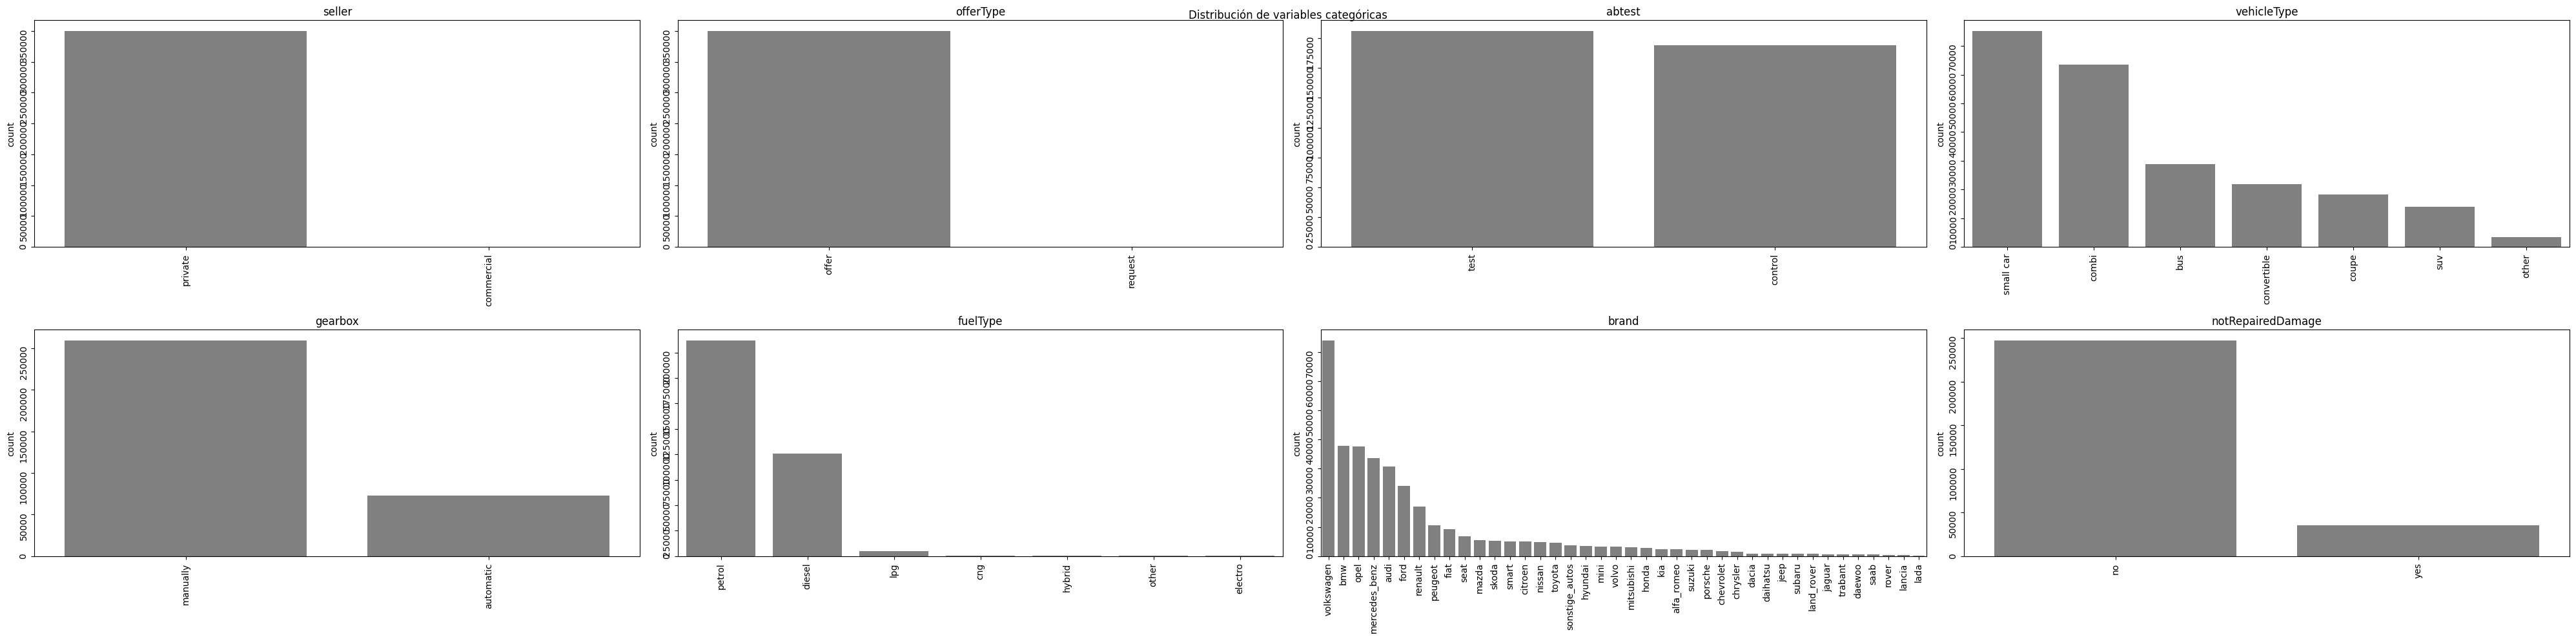

In [9]:
visualizador2.plot_categoricas()

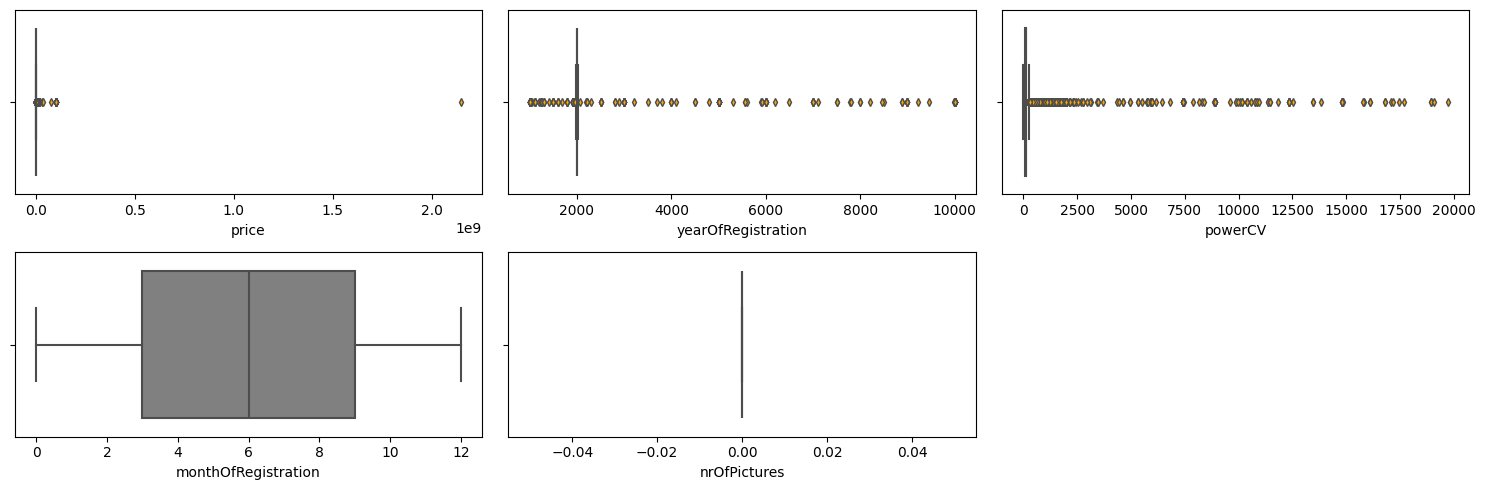

In [10]:
visualizador2.deteccion_outliers()

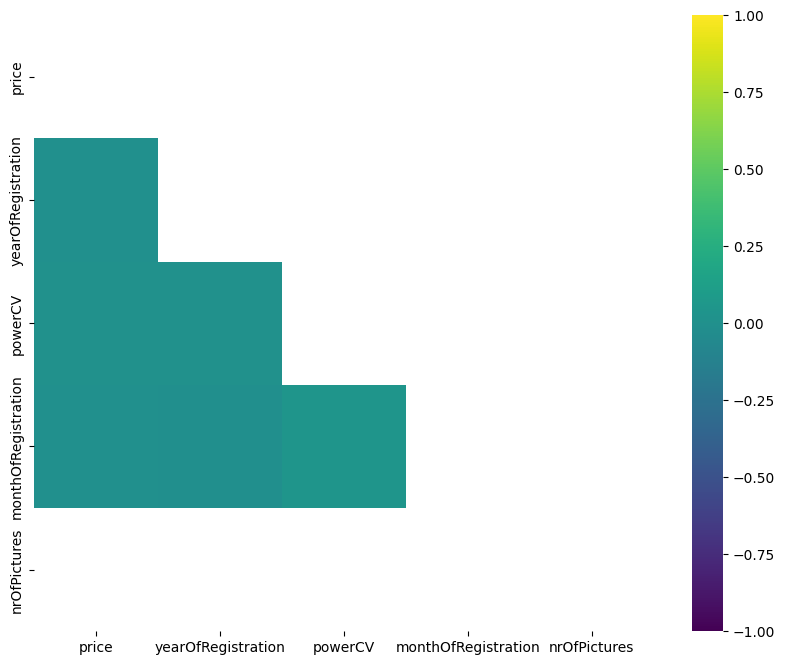

In [11]:
visualizador2.correlacion(tamano_grafica=(10, 8))

In [13]:
df_filtrado_categoricas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350056 entries, 0 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   seller               350056 non-null  object 
 1   offerType            350056 non-null  object 
 2   price                350056 non-null  int64  
 3   abtest               350056 non-null  object 
 4   vehicleType          224722 non-null  object 
 5   yearOfRegistration   350056 non-null  int64  
 6   gearbox              332495 non-null  object 
 7   powerCV              350056 non-null  float64
 8   monthOfRegistration  350056 non-null  int64  
 9   fuelType             318853 non-null  object 
 10  brand                350056 non-null  object 
 11  notRepairedDamage    282360 non-null  object 
 12  nrOfPictures         350056 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 37.4+ MB
